In [18]:
import os
import numpy as  np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from ultralytics import YOLO
from PIL import Image
import cv2
from IPython.display import Video
import warnings
warnings.filterwarnings('ignore')
import kagglehub
path = kagglehub.dataset_download("pkdarabi/cardetection")
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\pkdarabi\cardetection\versions\5


['car', 'video.mp4']

In [19]:
BASE_PATH = os.path.join(path, "car")
os.listdir(BASE_PATH)

['data.yaml',
 'README.dataset.txt',
 'README.roboflow.txt',
 'test',
 'train',
 'valid']

In [31]:
Image_dir = os.path.join(BASE_PATH, "train","images")
class_names = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']

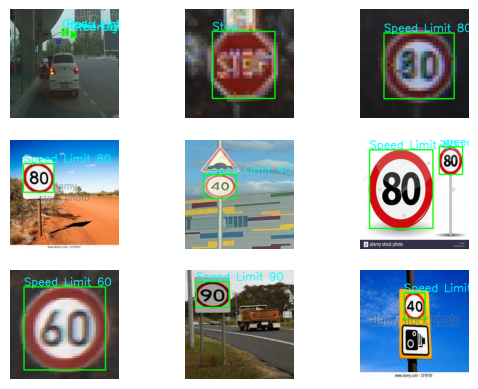

<Figure size 640x480 with 0 Axes>

In [37]:
image_files = os.listdir(Image_dir)
random_images = np.random.choice(image_files, size=9, replace=False)

for i,image in enumerate(random_images):
    plt.subplot(3,3,i+1)
    img_path = os.path.join(Image_dir, image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_path = os.path.join(BASE_PATH, "train", "labels", image)
    label_path = label_path.replace(".jpg", ".txt")
    with open(label_path,"r") as f:
        results = f.read().strip().split("\n")
        for result in results:
            class_id, x_center, y_center, width, height = map(float, result.split())
            x_min = int((x_center - width / 2) * img.shape[1])
            y_min = int((y_center - height / 2) * img.shape[0])
            x_max = int((x_center + width / 2) * img.shape[1])
            y_max = int((y_center + height / 2) * img.shape[0])

            cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

            text_scale = max(0.5, min(img.shape[1], img.shape[0]) / 300)
            text_thickness = max(1, int(text_scale * 2))
            classe = class_names[int(class_id)]
            cv2.putText(
                img,
                classe,
                (x_min, max(y_min - 5, 0)),
                cv2.FONT_HERSHEY_SIMPLEX,
                text_scale,
                (0, 255, 255),
                text_thickness,
                cv2.LINE_AA,
            )
    plt.imshow(img)
    plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

In [38]:
os.listdir(BASE_PATH)

['data.yaml',
 'README.dataset.txt',
 'README.roboflow.txt',
 'test',
 'train',
 'valid']

In [53]:
data_yaml = os.path.join(BASE_PATH, "data.yaml")

In [54]:
data_yaml

'C:\\Users\\PC\\.cache\\kagglehub\\datasets\\pkdarabi\\cardetection\\versions\\5\\car\\data.yaml'

In [55]:
model =  YOLO("yolo11s.pt")

In [56]:
model.train(data=data_yaml,epochs=30,optimizer="adam")

New https://pypi.org/project/ultralytics/8.3.74 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.73  Python-3.12.4 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\PC\.cache\kagglehub\datasets\pkdarabi\cardetection\versions\5\car\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_n

train: Scanning C:\Users\PC\.cache\kagglehub\datasets\pkdarabi\cardetection\versions\5\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]
val: Scanning C:\Users\PC\.cache\kagglehub\datasets\pkdarabi\cardetection\versions\5\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.33G      1.245      2.843      1.452         25        640: 100%|██████████| 221/221 [01:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.50it/s]

                   all        801        944     0.0626      0.192     0.0533     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.42G      1.118       2.21       1.35         24        640: 100%|██████████| 221/221 [01:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]

                   all        801        944     0.0985     0.0721     0.0216     0.0136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.41G      1.083      2.132       1.32         25        640: 100%|██████████| 221/221 [00:58<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]

                   all        801        944     0.0925      0.549       0.15     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.42G      1.017      2.006      1.273         18        640: 100%|██████████| 221/221 [00:58<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]

                   all        801        944      0.141      0.434      0.208      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.42G     0.9673      1.917      1.248         26        640: 100%|██████████| 221/221 [00:56<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.66it/s]

                   all        801        944      0.268      0.577      0.226       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.39G     0.9151      1.858      1.203         21        640: 100%|██████████| 221/221 [00:56<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.62it/s]

                   all        801        944      0.207      0.542      0.269      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.43G     0.8957      1.826      1.187         24        640: 100%|██████████| 221/221 [00:57<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]

                   all        801        944      0.249      0.433      0.288      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.42G     0.8671      1.763      1.169         25        640: 100%|██████████| 221/221 [01:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]

                   all        801        944      0.296      0.484      0.291      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.41G     0.8628      1.742       1.16         31        640: 100%|██████████| 221/221 [01:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.59it/s]

                   all        801        944      0.362      0.455      0.289      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       4.4G     0.8428      1.709      1.145         17        640: 100%|██████████| 221/221 [01:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]

                   all        801        944      0.233      0.539      0.304      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.42G     0.8147      1.668      1.132         16        640: 100%|██████████| 221/221 [01:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]

                   all        801        944      0.238      0.486      0.335      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.42G       0.81      1.646      1.133         24        640: 100%|██████████| 221/221 [00:59<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]

                   all        801        944      0.313      0.554      0.327      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.43G     0.7987      1.617       1.12         26        640: 100%|██████████| 221/221 [01:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]

                   all        801        944      0.253      0.563       0.36      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.39G     0.7737      1.576      1.105         28        640: 100%|██████████| 221/221 [01:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]

                   all        801        944      0.367      0.512      0.382      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.43G     0.7601      1.547      1.099         25        640: 100%|██████████| 221/221 [01:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.34it/s]

                   all        801        944      0.306      0.516      0.392      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.41G     0.7502      1.502      1.097         19        640: 100%|██████████| 221/221 [01:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]

                   all        801        944      0.331      0.465      0.431      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.43G     0.7443      1.458       1.09         18        640: 100%|██████████| 221/221 [01:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]

                   all        801        944      0.417      0.529      0.506      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.39G     0.7424      1.421      1.091         25        640: 100%|██████████| 221/221 [01:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]

                   all        801        944      0.554      0.524      0.569      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.42G     0.7288      1.358      1.082         20        640: 100%|██████████| 221/221 [01:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]

                   all        801        944      0.584      0.551      0.579      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.42G     0.7245      1.338      1.076         24        640: 100%|██████████| 221/221 [01:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]

                   all        801        944      0.561      0.628      0.615      0.501


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.41G      0.727      1.147      1.093         12        640: 100%|██████████| 221/221 [01:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]

                   all        801        944      0.595       0.64      0.636      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.37G     0.7057      1.085      1.071         18        640: 100%|██████████| 221/221 [01:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]

                   all        801        944      0.745      0.644      0.718      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.42G     0.6878      0.981      1.058         12        640: 100%|██████████| 221/221 [01:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]

                   all        801        944      0.736      0.656      0.754      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.41G     0.6815      0.905      1.052         10        640: 100%|██████████| 221/221 [01:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]

                   all        801        944      0.832      0.671      0.793      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.41G     0.6687     0.8146       1.04         12        640: 100%|██████████| 221/221 [01:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]

                   all        801        944      0.851       0.74      0.843      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.39G     0.6573     0.7575      1.028         10        640: 100%|██████████| 221/221 [01:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]

                   all        801        944      0.874      0.762      0.849      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.41G     0.6485     0.6949      1.017         15        640: 100%|██████████| 221/221 [01:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.44it/s]

                   all        801        944      0.913      0.757      0.865      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       4.4G      0.627     0.6658      1.009         10        640: 100%|██████████| 221/221 [01:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.44it/s]

                   all        801        944      0.893      0.787      0.876      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       4.4G     0.6093     0.6224      1.002         12        640: 100%|██████████| 221/221 [01:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]

                   all        801        944      0.914      0.789       0.89      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.37G      0.597     0.5933     0.9884         13        640: 100%|██████████| 221/221 [01:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]

                   all        801        944      0.912      0.796       0.89      0.762



30 epochs completed in 0.693 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 19.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.73  Python-3.12.4 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11s summary (fused): 238 layers, 9,418,605 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.93it/s]


                   all        801        944      0.914      0.789       0.89      0.763
           Green Light         87        122      0.864      0.615      0.758      0.425
             Red Light         74        108      0.818      0.665      0.748      0.431
       Speed Limit 100         52         52      0.949      0.885      0.959      0.861
       Speed Limit 110         17         17      0.943      0.647      0.818      0.762
       Speed Limit 120         60         60      0.981      0.841      0.944      0.866
        Speed Limit 20         56         56      0.979      0.893      0.973       0.83
        Speed Limit 30         71         74      0.943      0.878      0.951      0.876
        Speed Limit 40         53         55      0.901      0.891      0.953      0.838
        Speed Limit 50         68         71      0.973      0.732       0.89      0.807
        Speed Limit 60         76         76      0.928      0.852      0.915      0.813
        Speed Limit 7

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021AAA5D33B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [64]:
def display_images(image_files_path,image_files):

    for image_file in image_files:
        img_path = os.path.join(image_files_path, image_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.axis('off')
        plt.show()
        plt.tight_layout()

In [65]:
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]
image_files_path = "runs/detect/train"

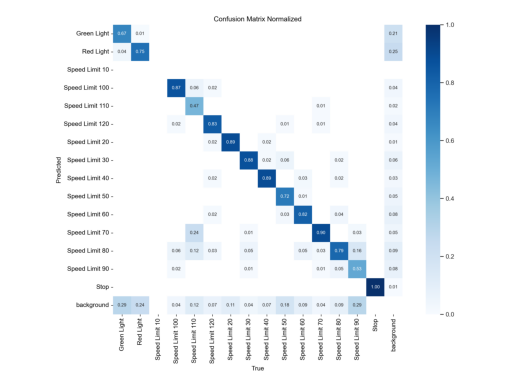

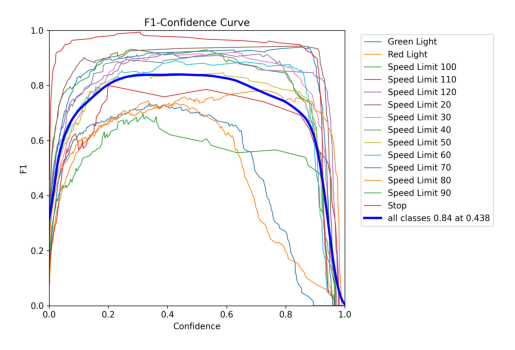

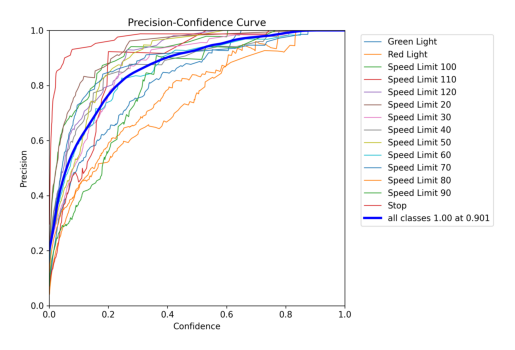

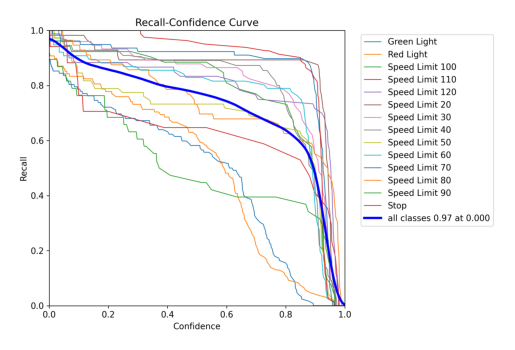

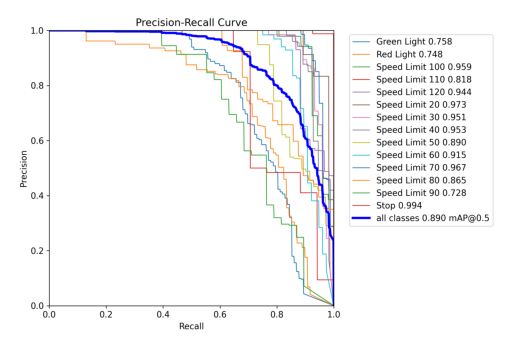

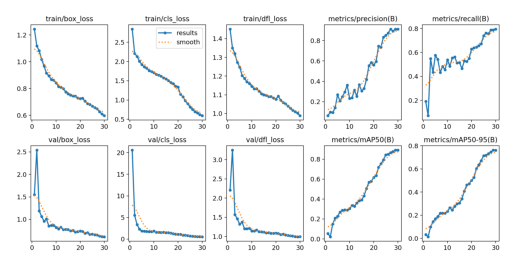

<Figure size 640x480 with 0 Axes>

In [66]:
display_images(image_files_path,image_files)

In [15]:
best_model = YOLO("runs/detect/train/weights/best.pt")

In [20]:
def process_image(image,size=(640,640)):
    image = cv2.resize(image,size)
    image = image/255.0
    return img


0: 640x640 (no detections), 13.5ms
Speed: 3.0ms preprocess, 13.5ms inference, 36.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 2 Red Lights, 12.5ms
Speed: 3.1ms preprocess, 12.5ms inference, 94.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 50, 1 Speed Limit 60, 1 Speed Limit 80, 12.1ms
Speed: 3.3ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 25.4ms
Speed: 3.5ms preprocess, 25.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 1 Speed Limit 80, 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Green Lights, 24.9ms
Speed: 3.7ms preprocess, 24.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x

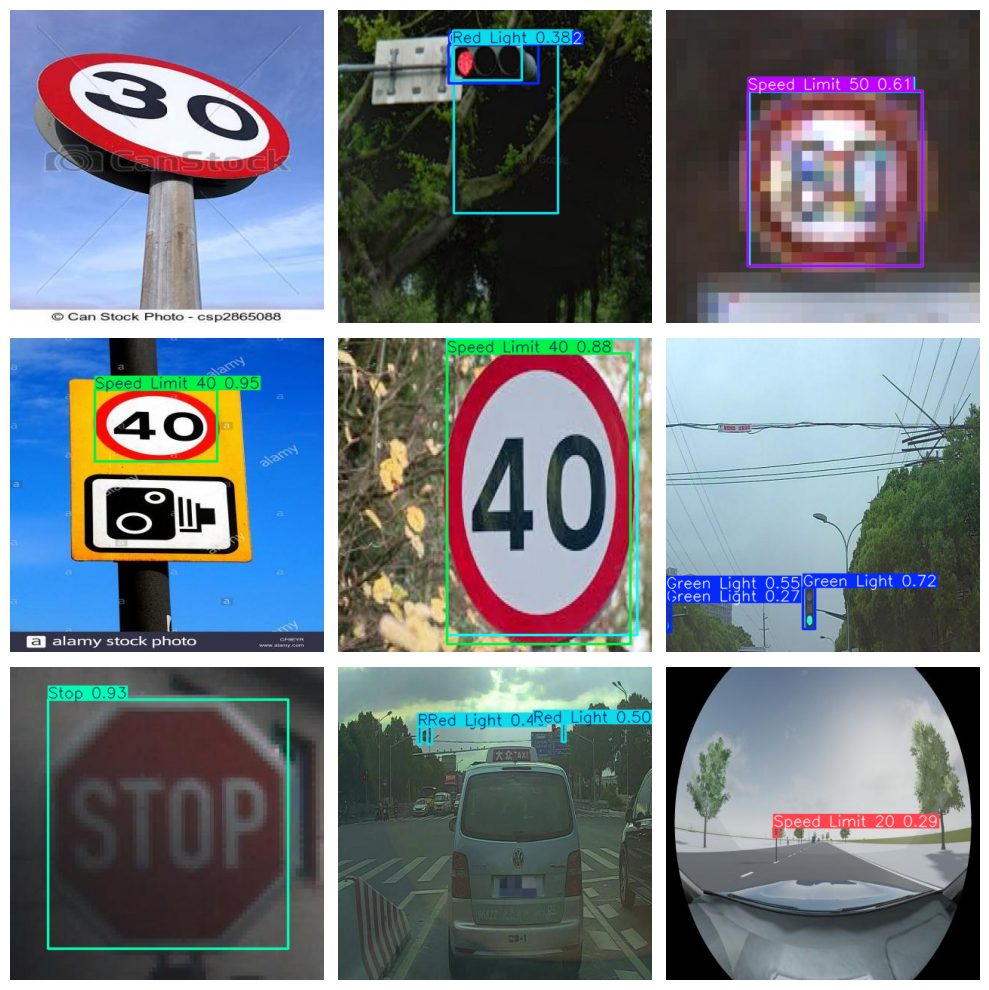

In [21]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
test_image_path = os.path.join(BASE_PATH, "test", "images")
image_files = [file for file in os.listdir(test_image_path) if file.endswith(".jpg")]

random_test_image = random.sample(image_files, 9)

fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(ax.flatten()):
    img_path = os.path.join(test_image_path, random_test_image[i])
    img = cv2.imread(img_path)

    if img is not None:
        img = process_image(img)  # Ön işleme fonksiyonu
        results = best_model.predict(img)  # Modelin tahmini

        plot_img = results[0].plot()
        plot_img_rgb = cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB)
        ax.imshow(plot_img_rgb)
    else:
        print("No image")

    ax.axis('off')

plt.tight_layout()
plt.show()  # Döngü bittikten sonra tek bir kez çağrılmalı!


In [10]:
video_path = os.path.join(path, "video.mp4")

In [85]:
best_model.predict(video_path,save=True)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) C:\Users\PC\.cache\kagglehub\datasets\pkdarabi\cardetection\versions\5\video.mp4: 640x640 (no detections), 76.9ms
video 1/1 (frame 2/508) C:\Users\PC\.cache\kagglehub\datasets\pkdarabi\cardetection\versions\5\video.mp4: 640x640 1 Stop, 77.3ms
video 1/1 (frame 3/508) C:\Users\PC\.cache\kagglehub\datasets\pkdarabi\cardetection\versions\5\video.mp4: 640x640 1 Stop, 45.3ms
video 1/1 (frame 4/508) C:\Users\PC\.cache\kagglehub\datasets\

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
     